In [ ]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import scipy.io.netcdf as sp
import netCDF4 as nc
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

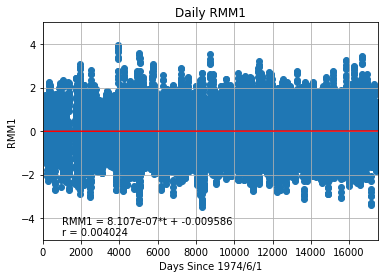

In [ ]:
# This script creates a graph of RMM1 data each day.

# Open the dataset file, separating by whitespaces. Skip first two rows, which do not have data.
f = pd.read_csv('/content/drive/Shared drives/Research Project Data/CSATS/rmm.74toRealtime.txt',
                sep='\s+', skiprows=2, header=None)

# Get a subset of the dataset that ignores the last 2 columns that have unimportant information.
# Then convert the data to numbers and mark missing entries. Finally, name the columns.
data = f.iloc[:, :6]
data = data.apply(pd.to_numeric)
data[data > 900] = np.NaN
data.rename(columns={0:'year', 1:'month', 2:'day', 3:'RMM1', 4:'RMM2', 5:'phase'}, inplace=True)

# Identify missing entries. Get the slope, y-intercept, and correlation coefficient for the best-fit line through the non-missing RMM1 each day.
idx = np.isfinite(data['RMM1'])
m, b = np.polyfit(data.index[idx], data['RMM1'][idx], 1)
r = np.corrcoef(data.index[idx], data['RMM1'][idx])[0,1]

# Create a scatter plot of the RMM1 each day and overlay the best-fit line.
plt.scatter(data.index, data['RMM1'])
plt.plot(data.index, m * data.index + b, color='red')

# Adjust the scales of the axes and add text for linear regression
plt.axis([0, 17500, -5, 5])
plt.text(1000, -4.8, 'RMM1 = ' + f'{m:.4g}' + '*t + ' + f'{b:.4g}' + '\nr = ' + f'{r:.4g}')

# Add a graph title, axis labels, and a grid to the graph.
plt.title('Daily RMM1')
plt.xlabel('Days Since 1974/6/1')
plt.ylabel('RMM1')
plt.grid()

# Save a PNG image of the graph
plt.savefig('/content/drive/My Drive/Research Project for CSATS/RMM1-Daily_Graph.png', bbox_inches='tight', dpi=200)